In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error


In [185]:
%matplotlib inline

In [186]:
HouseDF = pd.read_csv(r"C:\Users\Ranjitha Arun\Desktop\DSP-GIT\dsp-ranjitha-vadivel\data\housing.csv") ## now importing california house pricing dataset

In [187]:
HouseDF.shape

(20640, 10)

In [188]:
HouseDF.head()   ## it will give first five rows of dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

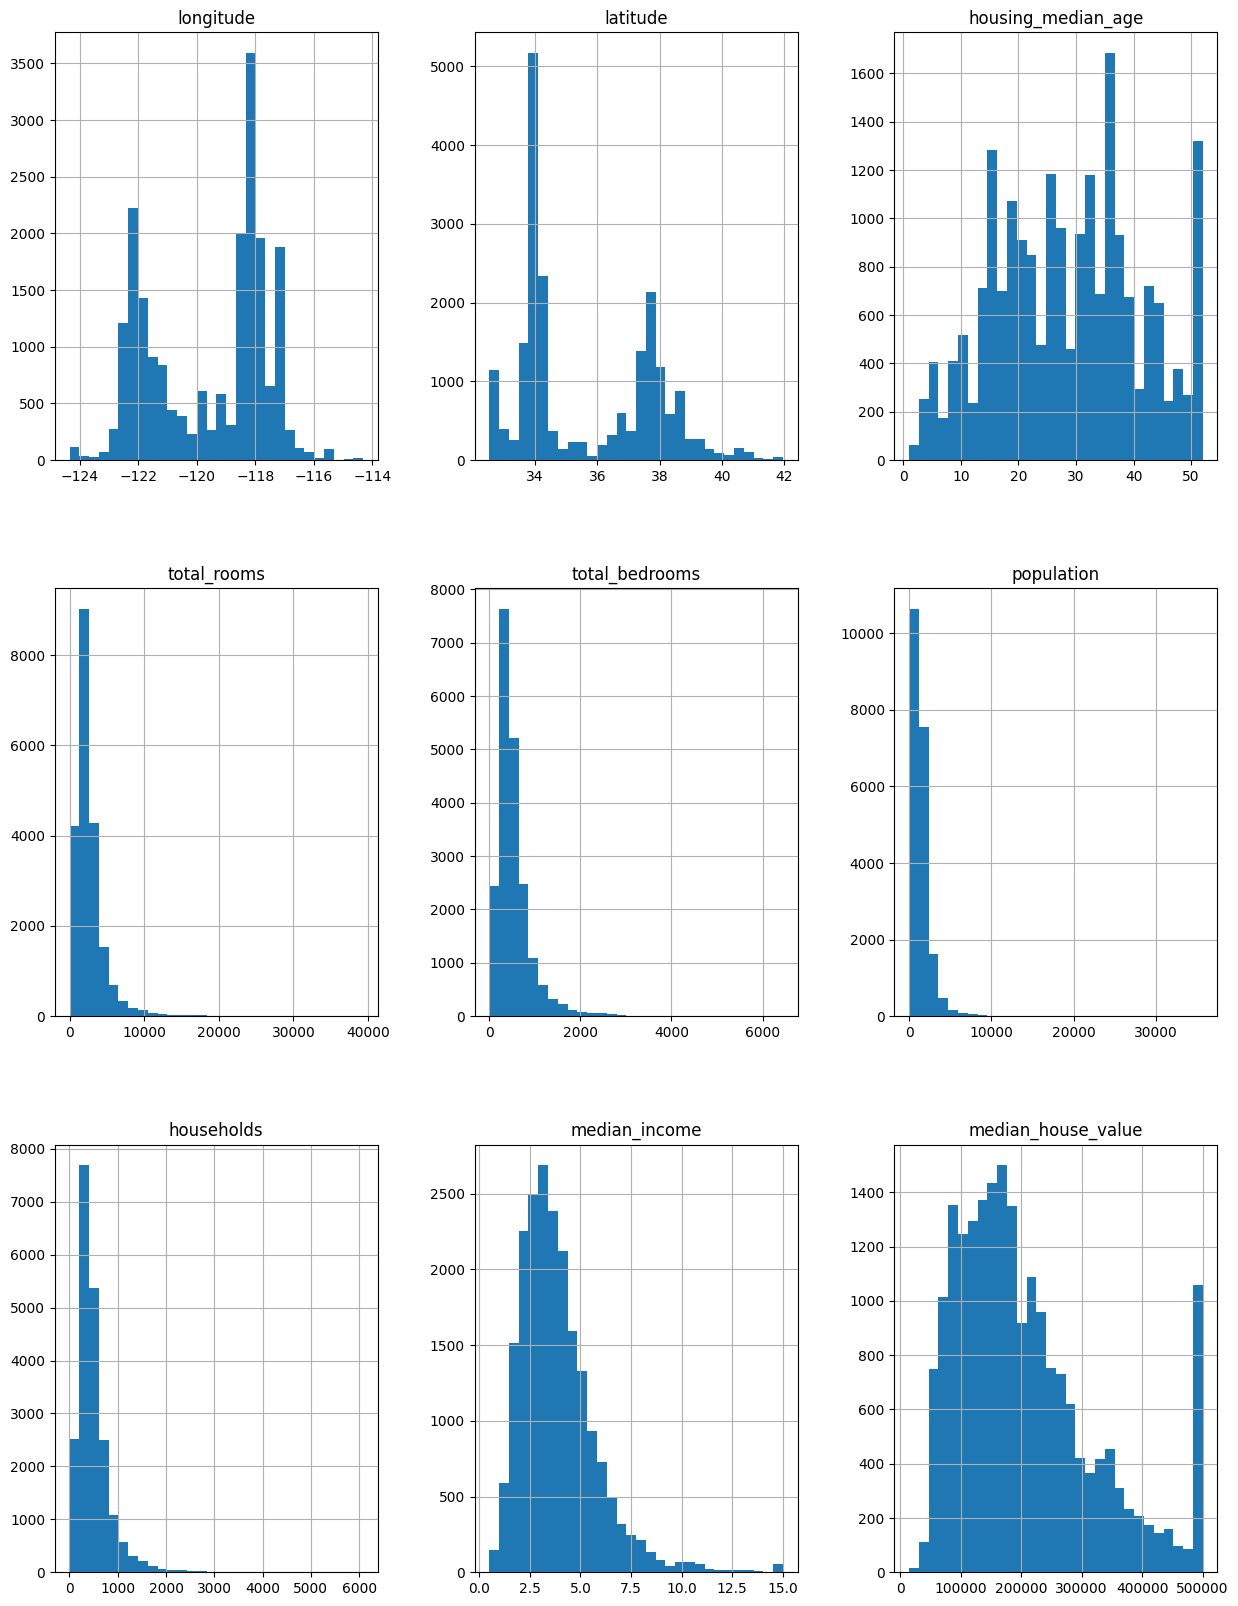

In [189]:
HouseDF.hist(bins=30,figsize=(15,20))

In [190]:
HouseDF.info() ## it include all average values where ocean_proximity is non numeric value it is in object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [191]:
HouseDF["ocean_proximity"].value_counts() ##<1H less than one hour distance from ocean

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [192]:
HouseDF.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='longitude', ylabel='latitude'>

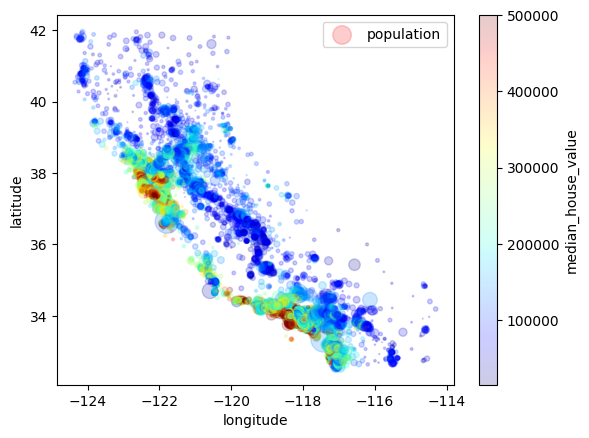

In [193]:
HouseDF.plot(kind="scatter",x="longitude", y="latitude", alpha=0.2, s=HouseDF["population"]/100, label="population"
            , c="median_house_value", cmap=plt.get_cmap("jet"))

In [194]:
## where the above color red represent the expensive houses whereas blue represent the less expensive

In [195]:
HouseDF.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [208]:
HouseDF['total_rooms'] = np.log(HouseDF['total_rooms']+1)
HouseDF['total_bedrooms'] = np.log(HouseDF['total_bedrooms']+1)
HouseDF['population'] = np.log(HouseDF['population']+1)
HouseDF['households'] = np.log(HouseDF['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

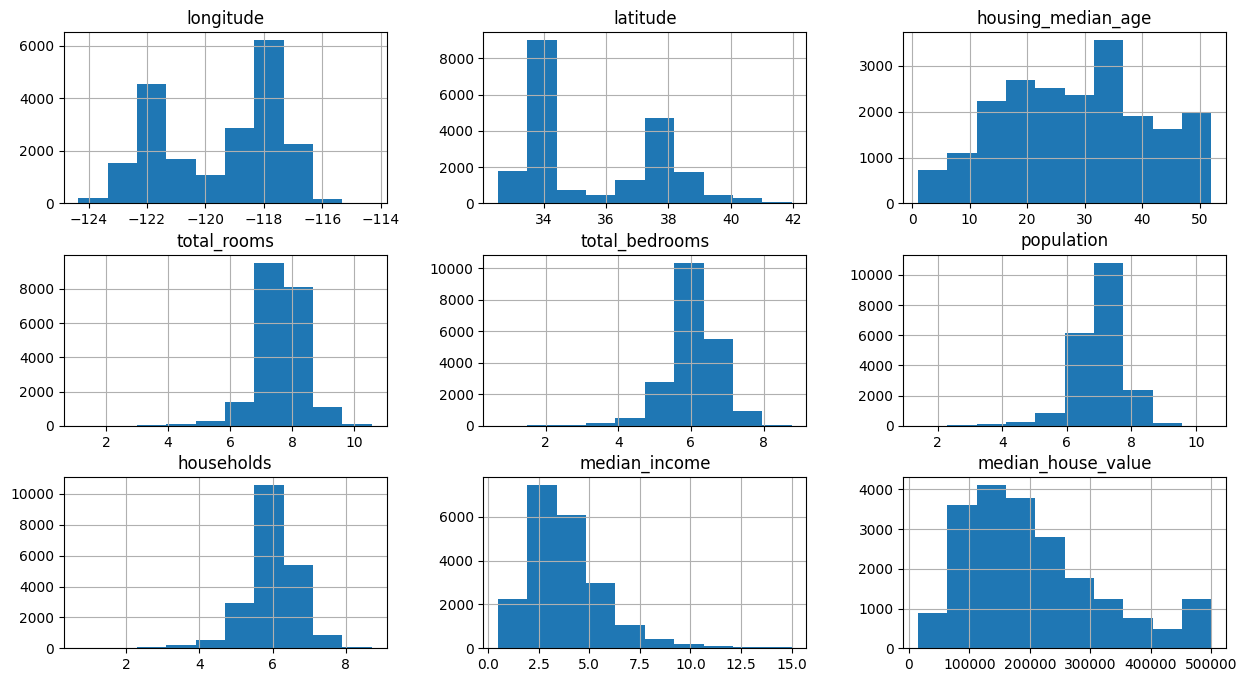

In [209]:
HouseDF.hist(figsize=(15,8))

In [196]:
housing=HouseDF.dropna(subset=["total_bedrooms"])
housing.shape

(20433, 10)

In [197]:
continuous_features = ['longitude', 'latitude']
HouseDF[continuous_features].head()

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [198]:
categorical_features = ['households', 'housing_median_age']
HouseDF[categorical_features].head()

,households,housing_median_age
0,126.0,41.0
1,1138.0,21.0
2,177.0,52.0
3,219.0,52.0
4,259.0,52.0


In [210]:
train_HouseDF, test_HouseDF = train_test_split(HouseDF, test_size=0.2, random_state=42)

In [211]:
scaler = StandardScaler()
X_train_continuous = scaler.fit_transform(train_HouseDF[continuous_features])
X_test_continuous = scaler.transform(test_HouseDF[continuous_features])

In [217]:
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(train_HouseDF[categorical_features])
X_test_categorical = encoder.transform(test_HouseDF[categorical_features])
X_train = np.hstack((X_train_continuous, X_train_categorical.toarray()))
X_test = np.hstack((X_test_continuous, X_test_categorical.toarray()))

In [239]:
y_train = train_HouseDF['median_house_value']
model = LinearRegression()
model.fit(X_train, np.log(y_train))
y_test = test_HouseDF['median_house_value']
y_pred = np.exp(model.predict(X_test))
rmsle = mean_squared_log_error(y_test, y_pred, multioutput = "raw_values")
print(rmsle)

[4.53171023]
